In [1]:
# ElasticNet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Given Dataset
data=pd.read_csv('TexasTurbine (2).csv')

In [4]:
data

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963
...,...,...,...,...,...,...
8755,"Dec 31, 07:00 pm",1234.70,8.848,129,0.998604,19.663
8756,"Dec 31, 08:00 pm",1105.37,8.502,118,1.000090,19.063
8757,"Dec 31, 09:00 pm",1405.71,9.224,117,0.998408,18.463
8758,"Dec 31, 10:00 pm",1221.36,8.799,116,0.998013,18.063


In [5]:
del data['Time stamp']

In [6]:
data

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,1766.64,9.926,128,1.000480,18.263
1,1433.83,9.273,135,0.999790,18.363
2,1167.23,8.660,142,0.999592,18.663
3,1524.59,9.461,148,0.998309,18.763
4,1384.28,9.184,150,0.998507,18.963
...,...,...,...,...,...
8755,1234.70,8.848,129,0.998604,19.663
8756,1105.37,8.502,118,1.000090,19.063
8757,1405.71,9.224,117,0.998408,18.463
8758,1221.36,8.799,116,0.998013,18.063


In [7]:
df=data.dropna()

In [8]:
df

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,1766.64,9.926,128,1.000480,18.263
1,1433.83,9.273,135,0.999790,18.363
2,1167.23,8.660,142,0.999592,18.663
3,1524.59,9.461,148,0.998309,18.763
4,1384.28,9.184,150,0.998507,18.963
...,...,...,...,...,...
8755,1234.70,8.848,129,0.998604,19.663
8756,1105.37,8.502,118,1.000090,19.063
8757,1405.71,9.224,117,0.998408,18.463
8758,1221.36,8.799,116,0.998013,18.063


In [9]:
df=df.rename({'System power generated | (kW)':'System_power_generated','Wind speed | (m/s)':'Wind_speed',
             'Wind direction | (deg)':'Wind_direction','Pressure | (atm)':'Pressure',
              "Air temperature | ('C)":'Air_temperature'},axis=1)

In [10]:
df.columns

Index(['System_power_generated', 'Wind_speed', 'Wind_direction', 'Pressure',
       'Air_temperature'],
      dtype='object')

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score,median_absolute_error

In [12]:
X=df.drop(labels='System_power_generated',axis=1)
# Response Variable
y=df.loc[:,'System_power_generated']

In [13]:
# we'll use a test size of 30%. we also stratify the split on the response variable, which is very important to do because there are so few fradulent transactions
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [14]:
# Implementing ElasticNet
from sklearn.linear_model import ElasticNet
EN=ElasticNet()
EN.fit(X_train,y_train)

predicts=EN.predict(X_test)

mae=(mean_absolute_error(y_test,predicts))
print('MEAN ABSOLUTE ERROR VALUE IS:',mae)
print('')

mse=(mean_squared_error(y_test,predicts))
print('MEAN SQUARED ERROR VALUE IS:',mse)
print('')

medianAE=(median_absolute_error(y_test,predicts))
print('MEDIAN ABSOLUTE ERROR IS:',medianAE)
print('')

evs=(explained_variance_score(y_test,predicts)*100)
print('ACCURACY RESULT OF ELASTICNET IS:',evs)
print('')

r2=(r2_score(y_test,predicts))
print('R2 SCORE VALUE IS:',r2)
print('')

MEAN ABSOLUTE ERROR VALUE IS: 228.13834910421073

MEAN SQUARED ERROR VALUE IS: 70870.53601906849

MEDIAN ABSOLUTE ERROR IS: 226.58388274731874

ACCURACY RESULT OF ELASTICNET IS: 91.0750969248497

R2 SCORE VALUE IS: 0.9106821877094409



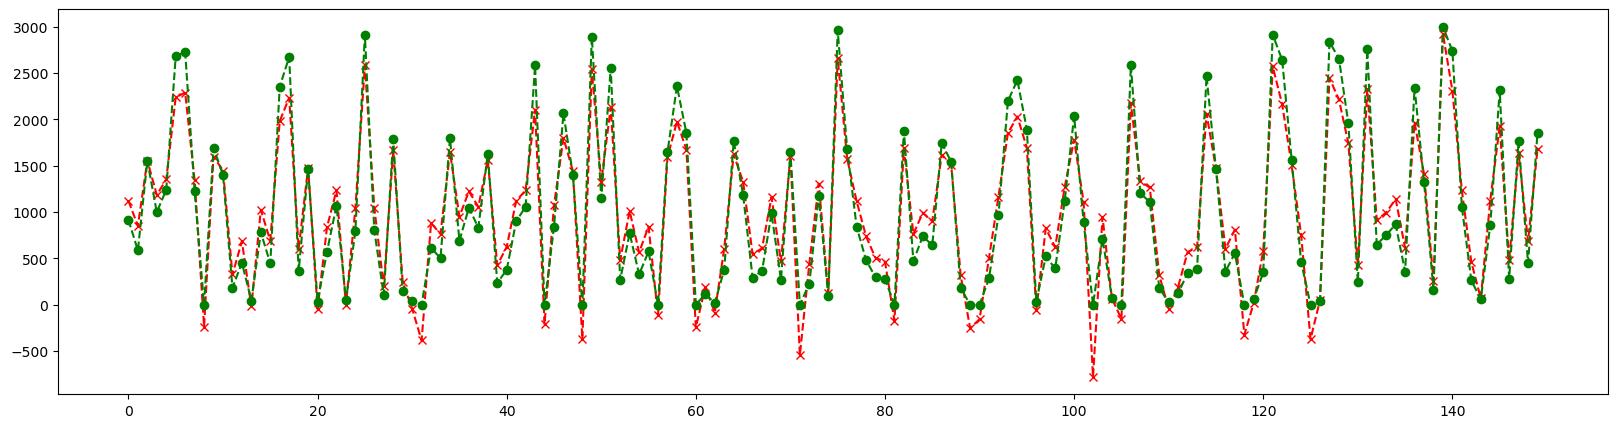

In [16]:
DF = pd.DataFrame()
DF["y_test"] = y_test
DF["predicted"] = predicts
DF.reset_index(inplace=True)
plt.figure(figsize=(20,5))
plt.plot(DF["predicted"][:150],marker='x',linestyle='dashed',color='red')
plt.plot(DF["y_test"][:150], marker='o',linestyle='dashed', color='green')
plt.show()